## Boston House Prediction 

### **Description**  
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

![picture](https://drive.google.com/uc?export=view&id=1wf0bOablKQLm7OjNlppnG3p778FHBvLl)


#### Importing all the required python pakages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Exploring the Boston Housing Dataset

In [2]:
# Importing the Boston Dataset which is in csv format 

df=pd.read_csv(r"K:\Ml Dataset\Boston.csv")

In [3]:
# finding the dtype, column present in the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [4]:
# Exploring the shape of the dataset

x,y=df.shape
print("Number of rows in Boston Housing Dataset    : ",x)     #Number of rows
print("Number of columns in Boston Housing Dataset : ",y)     #Number of Columns

Number of rows in Boston Housing Dataset    :  506
Number of columns in Boston Housing Dataset :  15


In [5]:
# Seeing the first five rows of the dataset in order to get the glance of the dataset

df.head(5)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Selecting the dependent and independent variable in the dataset

In [6]:
# Seeing the dataframe of both the dependent and independent column

sd=df.loc[:,['lstat','medv']]
sd.head()

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


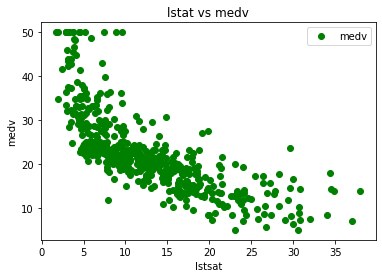

In [7]:
# Seeing the coorelation through visualisation through the scatter chart 

sd.plot(x='lstat',y='medv',style='o',color='green')
plt.title('lstat vs medv')
plt.xlabel('lstsat')
plt.ylabel('medv')
plt.show()

In [8]:
# x,y are independent and dependent variable repectively
# where, x = lstat column
#        y = medv column

x=pd.DataFrame(df['lstat'])   #Here, we have use pd.DataFrame in order to change it to pandas DataFrame 
y=pd.DataFrame(df['medv'])

In [9]:
print('The independent variable x are :\n',x)

The independent variable x are :
      lstat
0     4.98
1     9.14
2     4.03
3     2.94
4     5.33
..     ...
501   9.67
502   9.08
503   5.64
504   6.48
505   7.88

[506 rows x 1 columns]


In [10]:
print('The dependent variable y are :\n',y)

The dependent variable y are :
      medv
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]


#### Taking care of missing variables

In order to apply **Imputation** we must see if there is any null value

In [11]:
# To count any null value in the entire dataset
print('The dataset has null values: ',df.isnull().sum().sum())  
print('\n')

# To count any null value in the independent column  
print('x has null values: ',x.isnull().sum().sum())
print('\n')

# To count any null value in the dependent column 
print('y has null values: ',y.isnull().sum().sum())

The dataset has null values:  0


x has null values:  0


y has null values:  0


#### Note
We does not required to perform the encoding as there is no Categorical data in our dependent and independent column.

#### Splitting the Dataset into Test and Training Dataset and also checking its size

In [12]:
# using the train_test_split from the sklearn.model_selection

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

print('Size of x_train : ',x_train.shape)
print('Size of x_test  : ',x_test.shape)
print('Size of y_train : ',y_train.shape)
print('Size of y_test  : ',x_test.shape)

Size of x_train :  (354, 1)
Size of x_test  :  (152, 1)
Size of y_train :  (354, 1)
Size of y_test  :  (152, 1)


#### Feature Scaling : Standardisation
We will apply standardisation if there is any outlier in the dataset.<br>
But since there is only one column we will not apply standardisation

#### Training the model

In [13]:
#In this we will use the skleran .linear_model 

from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

#### Predicting the value

In [14]:
# Using predict() will give the prediction.

y_pred=regressor.predict(x_test)
print('Predicted values are: \n',y_pred)

Predicted values are: 
 [[27.31914909]
 [27.63999115]
 [16.98803475]
 [26.79663488]
 [24.88074943]
 [24.02822625]
 [29.91338632]
 [22.26817837]
 [17.79472336]
 [26.14578384]
 [27.12664386]
 [29.99588857]
 [21.74566416]
 [24.83491485]
 [23.47821128]
 [23.10236773]
 [12.91792404]
 [29.97755474]
 [27.41081825]
 [ 7.15193387]
 [23.67988344]
 [18.95892169]
 [25.71493879]
 [28.61168425]
 [29.94088707]
 [11.8637287 ]
 [15.57632968]
 [24.56907429]
 [27.56665583]
 [15.10881697]
 [29.18919996]
 [17.29970989]
 [31.58176504]
 [19.15142693]
 [25.8891102 ]
 [21.76399799]
 [17.91389327]
 [29.33587062]
 [12.82625488]
 [20.48979666]
 [27.4933205 ]
 [28.03416854]
 [27.25498068]
 [12.12956926]
 [17.69388728]
 [13.37626984]
 [32.46178898]
 [19.23392917]
 [25.22909224]
 [24.47740513]
 [23.53321278]
 [23.93655709]
 [29.44587361]
 [24.04656008]
 [ 7.01443013]
 [28.05250237]
 [ 6.74858956]
 [28.74002108]
 [20.77397106]
 [30.60090503]
 [20.453129  ]
 [28.23584069]
 [15.96134016]
 [18.05139701]
 [ 7.13360004]
 

##### Visualisation with training data

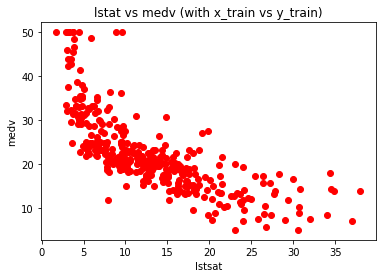

In [15]:
plt.scatter(x_train,y_train,color='red')
plt.title('lstat vs medv (with x_train vs y_train)')
plt.xlabel('lstsat')
plt.ylabel('medv')
plt.show()

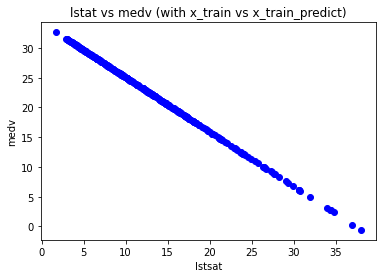

In [16]:
plt.scatter(x_train,regressor.predict(x_train),color='blue')
plt.title('lstat vs medv (with x_train vs x_train_predict)')
plt.xlabel('lstsat')
plt.ylabel('medv')
plt.show()

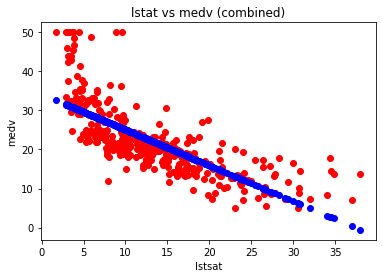

In [17]:
plt.scatter(x_train,y_train,color='red')
plt.scatter(x_train,regressor.predict(x_train),color='blue')
plt.title('lstat vs medv (combined)')
plt.xlabel('lstsat')
plt.ylabel('medv')
plt.show()

##### Visualisation with testing data

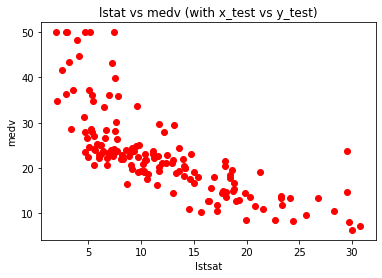

In [18]:
plt.scatter(x_test,y_test,color='red')
plt.title('lstat vs medv (with x_test vs y_test)')
plt.xlabel('lstsat')
plt.ylabel('medv')
plt.show()

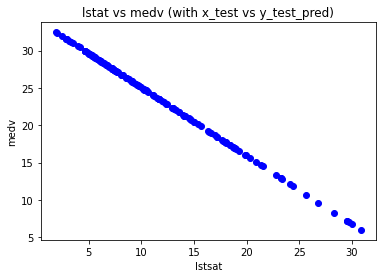

In [19]:
plt.scatter(x_test,y_pred,color='blue')
plt.title('lstat vs medv (with x_test vs y_test_pred)')
plt.xlabel('lstsat')
plt.ylabel('medv')
plt.show()

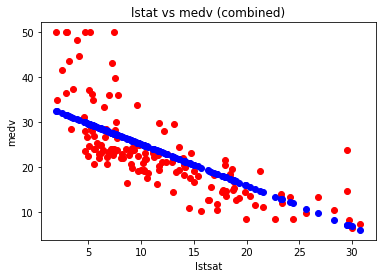

In [20]:
plt.scatter(x_test,y_test,color='red')
plt.scatter(x_test,y_pred,color='blue')
plt.title('lstat vs medv (combined)')
plt.xlabel('lstsat')
plt.ylabel('medv')
plt.show()

##### Testing the model

In [21]:
y_pred1=regressor.predict([[16]])
print(y_pred1)

[[19.55477123]]


C:\Users\kshit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Predicting the Equation

In [22]:
# getting the final linear regression equation with the values of the coefficient

print("The Regression Coefficient is :",regressor.coef_)       #slope or m or B1

The Regression Coefficient is : [[-0.9166916]]


In [23]:
print("The Regression Intercept is : ",regressor.intercept_)  #y-intercept when x value or year_exp = 0 or c or B0

The Regression Intercept is :  [34.22183685]


#### Model Evaluation

In [24]:
print("The model Regressor Score is: ",regressor.score(x_test,y_test)*100,"%")

The model Regressor Score is:  53.49901044757204 %
